In [129]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.vq import whiten

In [130]:
# 엑셀파일 불러오기

file_path = f'./raw_data_excel/3highway_sulac.xlsx'
df = pd.read_excel(file_path)
df = df.drop(['illegal','file_name'], axis=1)
df = df.loc[df['speed'] != 'learning']
# df['datetime'] = pd.to_datetime(df['datetime'])
df

,type,direction,speed,datetime
96,2,up,94.70705858297765,2025-12-25_04:14:16
97,2,down,118.04973562277547,2025-12-25_04:14:16
98,2,down,104.07592509348335,2025-12-25_04:14:17
99,2,up,77.05601239459439,2025-12-25_04:14:18
100,2,down,115.37542719770941,2025-12-25_04:14:18
...,...,...,...,...
4141,0,up,165.25171213989788,2025-12-25_05:30:40
4142,0,up,42.48299765560828,2025-12-25_05:30:40
4143,2,up,125.70448195848927,2025-12-25_05:30:43
4144,2,up,99.62089892055886,2025-12-25_05:30:46


In [131]:
# 속력을 정수로 바꾸기

df = df.reset_index(drop=True)
df['speed'] = df['speed'].astype(float)
df['speed'] = df['speed'].astype(int)

In [132]:
# 시간과 날짜 바꾸기

df['datetime'] = df['datetime'].str.replace('_', '')
df['datetime']=df['datetime'].str[:10] +' ' + df['datetime'].str[10:]
# df['datetime']

In [133]:
# 날짜 시간 데이터 타입 바꾸기
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0      2025-12-25 04:14:16
1      2025-12-25 04:14:16
2      2025-12-25 04:14:17
3      2025-12-25 04:14:18
4      2025-12-25 04:14:18
               ...        
4045   2025-12-25 05:30:40
4046   2025-12-25 05:30:40
4047   2025-12-25 05:30:43
4048   2025-12-25 05:30:46
4049   2025-12-25 05:30:46
Name: datetime, Length: 4050, dtype: datetime64[ns]

In [134]:
# 타입의 숫자를 문자로 바꾸어 주기
# names: {0: 'Center_Barrier', 1: 'Line', 2: 'Truck', 3: 'bus', 4: 'car'}
df.loc[df['type'] == 4,'type'] = 'car'
df.loc[df['type'] == 3, 'type'] = 'bus'
df.loc[df['type'] == 2, 'type'] = 'truck'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   type       4050 non-null   object        
 1   direction  4050 non-null   object        
 2   speed      4050 non-null   int64         
 3   datetime   4050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 126.7+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_17168\2931574075.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'car' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['type'] == 2,'type'] = 'car'


In [135]:
# 평균을 통한 속력 정확도 : 54.3%
normal = df.loc[(df['speed'] >= 90) & (df['speed'] <= 130)]
len(normal) / len(df)

0.6676543209876543

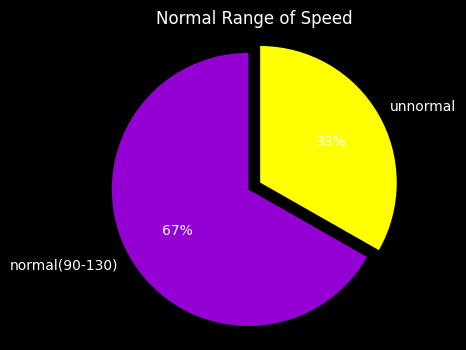

In [136]:
normal_ratio = len(df.loc[(df['speed'] >= 90) & (df['speed'] <= 130),'speed'])/len(df)
unnormal_ratio = 1 - normal_ratio

plt.figure(figsize=(4,4))
plt.pie(
    [normal_ratio, unnormal_ratio] ,
    labels = ['normal(90-130)', 'unnormal'],
    autopct  = '%1.0f%%',
    startangle = 90,
    explode = (0, 0.1),
    colors = ['darkviolet','yellow'],
    textprops={'color': 'white'}
)

plt.axis('equal')
plt.title('Normal Range of Speed')

plt.savefig(f'image/Normal Range of Speed.png')

plt.show()

In [137]:
# 정상범위 평균 속도 및 차종별 평균 속력
normal.speed.mean()
sd = df.groupby('type')['speed'].mean().astype(int)
sd

type
bus      72
car      82
truck    53
Name: speed, dtype: int64

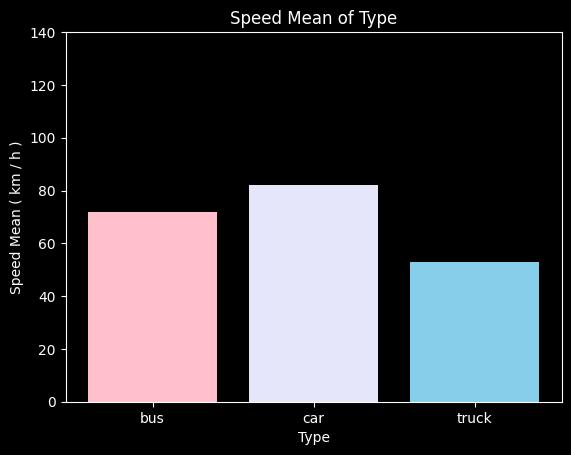

In [138]:
# 자동차, 버스, 트럭의 평균 속력

plt.bar(sd.index, sd, color = ['pink','lavender','skyblue'])

plt.title('Speed Mean of Type')
plt.xlabel('Type')
plt.ylabel('Speed Mean ( km / h )')

for i , value in enumerate(sd) :
    plt.text(i, value + 1, str(value), ha = 'center', va = 'bottom', color = 'black', fontsize = 10)

plt.ylim(0,140)

plt.savefig('./image/Speed Mean of Type.png')

plt.show()

In [139]:
dd = df.groupby('direction')['direction'].value_counts()
# dd = dd.loc[['car','bus','truck'], :]
dd

direction
down    2687
up      1363
Name: count, dtype: int64

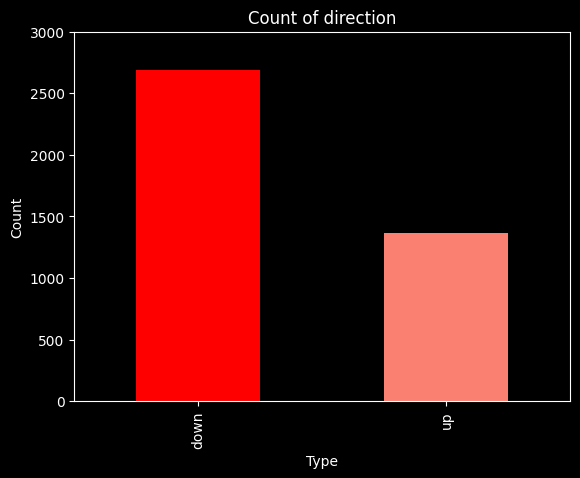

In [140]:

dd.plot.bar(
    color=['red','salmon','lightsalmon','blue','cornflowerblue','lightsteelblue']
)

plt.title('Count of direction')
plt.xlabel('Type')
plt.ylabel('Count')

# for i , value in enumerate(dd) :
#     plt.text(i, value + 2, str(value), ha = 'center', va = 'bottom', color = 'black', fontsize = 10)


plt.ylim(0,3000)

plt.show()

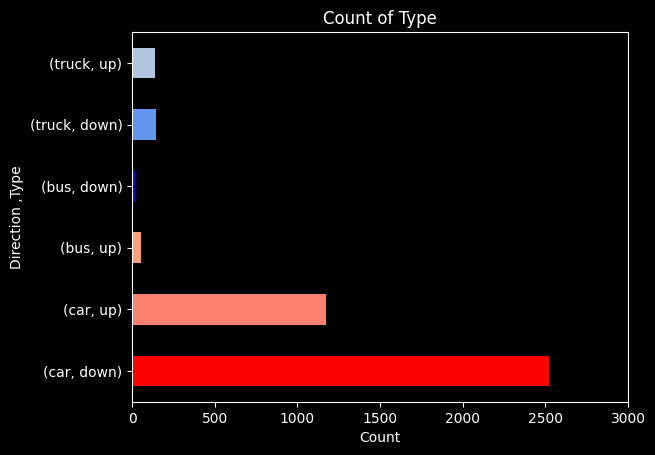

In [141]:
# 차종 별 유입, 유출
dc= df.groupby('type')['direction'].value_counts()
dc = dc.loc[['car','bus','truck'], :]
dc.plot.barh(color=['red','salmon','lightsalmon','blue','cornflowerblue','lightsteelblue'])

plt.title('Count of Type')
plt.xlabel('Count')
plt.ylabel('Direction ,Type')

for i , value in enumerate(dc) :
    plt.text(value + 10, i,  str(value), ha = 'left', va = 'center', color = 'black', fontsize = 10)


plt.xlim(0,3000)

# plt.savefig('Count of Type.png')

plt.show()

In [ ]:
최근접 분류에 활용할 데이터

[[     690.47      400.09]
 [     662.96      449.03]
 [      443.2      297.42]
 [     236.52      127.95]
 [     693.91      372.24]
 [     686.46      417.63]
 [     257.44      127.68]
 [     667.35      453.89]
 [     237.07      128.26]
 [     688.98      399.21]
 [     283.85      170.97]
 [     633.06      431.67]
 [     275.45      152.97]
 [     686.82      363.21]
 [     689.93      445.33]
 [     247.11       118.4]
 [      336.3      225.32]
 [     266.75      145.36]
 [     573.39      442.86]
 [     688.96      372.68]
 [      690.7      404.66]
 [     668.98      454.36]
 [     689.58      437.95]
 [     689.82      397.06]
 [     691.91      440.65]
 [     626.37      436.29]
 [     689.36      441.99]
 [     657.78      451.86]
 [      256.2      127.33]
 [     668.76      455.34]
 [     688.52      439.51]
 [     245.69      127.92]
 [     658.36      455.31]
 [     692.41      403.01]
 [     640.08      433.09]
 [      695.8      377.51]
 [     663.81      453.58]
 [     690.42      442.59]
 [     648.01      450.97]
 [     643.61      436.39]
 [     697.22       377.6]
 [     688.37       398.2]
 [     236.67       127.9]
 [     666.11      452.32]
 [     269.56      171.96]
 [     686.97      427.66]
 [     229.61      133.96]
 [     686.66       435.7]
 [     656.95       454.7]
 [     697.18      381.11]
 [     688.68      439.59]
 [     642.88      437.59]
 [     672.43      453.65]
 [     246.17       128.7]
 [     245.98      144.28]
 [     230.48      134.51]
 [      686.5      389.31]
 [     693.95      360.03]
 [      666.2      453.48]
 [     680.27      430.55]
 [     694.42       404.4]
 [     668.16      454.63]
 [      256.4      127.93]
 [     692.27      432.01]
 [     695.57      381.89]
 [     688.79      433.45]
 [     236.65      128.23]
 [     692.57      445.96]
 [     664.96      454.65]
 [     695.77       404.1]
 [     693.91      375.73]
 [     257.18       128.3]
 [     691.66      401.93]
 [     685.77      442.58]
 [     666.31      456.22]
 [      689.6      368.88]
 [      665.9      455.74]
 [     690.73       440.7]
 [     693.96      376.25]
 [     649.54      443.11]
 [     244.98      135.37]
 [     689.84      444.81]
 [     683.21      387.55]
 [     282.95      146.52]
 [     229.26      134.39]
 [     236.73       127.1]
 [     672.87      454.25]
 [     246.56      127.12]
 [     666.48      454.54]
 [     695.39      376.22]
 [      556.3      300.74]
 [     246.89      128.15]
 [     692.95      411.18]
 [     693.64      375.33]
 [     256.38      128.05]
 [     663.93      455.29]
 [     692.95       433.2]
 [     694.17      375.96]
 [     266.66      135.87]
 [     693.66       399.8]
 [     694.51      445.28]
 [     693.92      371.36]
 [     693.24       445.8]
 [     693.62      368.86]
 [     666.84      455.73]
 [     689.66      372.09]
 [     694.09      410.48]
 [     673.23      458.73]
 [     554.17      296.96]
 [     689.24         438]
 [     692.59      404.03]
 [      692.5      447.33]
 [     693.36      379.64]
 [     645.07      436.46]
 [     264.36      135.34]
 [     668.16      415.46]
 [     662.47      454.61]
 [     689.88      373.09]
 [        662      455.02]
 [     654.97      453.25]
 [     638.65      434.64]
 [     686.17      394.96]
 [     684.53      440.62]
 [     655.16      451.31]
 [     692.04      373.04]
 [     335.19      224.31]
 [     687.85      429.31]
 [     661.48      451.97]
 [     691.95       376.6]
 [     690.78      389.84]
 [     687.22      435.57]
 [     691.18      373.78]
 [     239.53      144.61]
 [     658.19      450.08]
 [     254.69       127.4]
 [     686.08      437.83]
 [     641.11      447.16]
 [     692.22       360.7]
 [     684.31      361.04]
 [     659.21      453.29]
 [     687.66      440.24]
 [     694.57      377.92]
 [      693.7      405.37]
 [     644.99      434.66]
 [     693.34      376.52]
 [     685.89      438.63]
 [     667.46      454.07]
 [     693.47      370.17]
 [     689.14      389.66]
 [     685.67      436.99]
 [     272.31      162.18]
 [     390.78      264.21]
 [      694.1      374.16]
 [     692.26      402.89]
 [     688.24      441.93]
 [     656.89      451.57]
 [     691.38      359.23]
 [     689.78      406.07]
 [     668.17      454.48]
 [     614.68      353.35]
 [     686.12      362.74]
 [     633.67       428.9]
 [     687.07      398.83]
 [     661.85      453.07]
 [     690.37      440.58]
 [      653.6      452.12]
 [     692.32      405.02]
 [     694.22      378.96]
 [     290.58      127.75]
 [     693.86       446.3]
 [     663.58      455.26]
 [     693.78      372.53]
 [     284.54       147.9]
 [     692.48      448.71]
 [     643.02      436.13]
 [     262.01      152.27]
 [     697.54      377.34]
 [     245.39         127]
 [     660.62      452.71]
 [     672.95      410.53]
 [     648.63      451.48]
 [     688.99      387.03]
 [     690.12      438.71]
 [     422.83      195.79]
 [      659.2      453.25]
 [     694.67      358.47]
 [      662.3       446.9]
 [     684.31      428.31]
 [     258.16      128.11]
 [     289.72      129.14]
 [     691.06      382.71]
 [      662.8      454.87]
 [     245.85      117.59]
 [     693.57      446.26]
 [     691.49      443.09]
 [     695.88      381.39]
 [     422.64      195.86]
 [     685.24      381.22]
 [      639.7      432.63]
 [     230.96      134.65]
 [     426.86      461.43]
 [      252.7      255.79]
 [     212.61      182.44]
 [     203.56      218.97]
 [     169.87      187.79]
 [     193.72      152.49]
 [     176.56      135.15]
 [     159.43      144.18]
 [     167.21      156.41]
 [     186.46      171.01]
 [     190.84      145.16]
 [     177.05       128.4]
 [     176.89      125.95]
 [      191.1      135.88]
 [     177.93       126.5]
 [     148.05       145.5]
 [     150.94      145.81]
 [     175.78      127.85]
 [     166.25      170.05]
 [     186.69      126.41]
 [     176.94      145.43]
 [     177.74      128.74]
 [     184.31      445.17]
 [     149.98      143.45]
 [     149.89      144.86]
 [     176.84      127.37]
 [     191.94      148.15]
 [     192.79      449.29]
 [     191.13      145.46]
 [     162.42      143.49]
 [     194.81       154.4]
 [     190.35      143.81]
 [     228.29      171.44]
 [     187.44      126.63]
 [     178.65      144.75]
 [     186.77      169.88]
 [      190.9      144.46]
 [     163.35      151.26]
 [     177.85      135.28]
 [     190.99      143.19]
 [     145.06      173.94]
 [     175.94      128.53]
 [     164.14      137.08]
 [     149.96      145.78]
 [     146.68      166.53]
 [     181.76      155.76]
 [     191.04      145.16]
 [     423.21      195.83]
 [     176.28      136.01]
 [     180.36      449.65]
 [     177.18      145.79]
 [     186.35       444.3]
 [     201.23      136.41]
 [     182.21      165.83]
 [     187.08      438.21]
 [     184.08      166.87]
 [     190.52      146.44]
 [     162.33      149.63]
 [     190.51      145.62]
 [     149.81      146.92]
 [     176.89      145.74]
 [     189.91      143.57]
 [     173.27       134.7]
 [     201.99      217.87]
 [     163.91      160.62]
 [     149.75       145.3]
 [     192.26      454.84]
 [     147.62      161.98]
 [     190.66      144.17]
 [     149.36      145.19]
 [     189.89      445.74]
 [     165.23      170.38]
 [     181.32      171.65]
 [     190.57       146.8]
 [     165.43      127.08]
 [     176.57      135.02]
 [     190.64      143.23]
 [     181.83      443.56]
 [     175.86      143.96]
 [     175.76      135.01]
 [     191.01       144.1]
 [     187.74      135.69]
 [     227.57      171.78]
 [     177.29      127.93]
 [     150.02      144.88]
 [     191.15      145.47]
 [     200.67      136.59]
 [     149.81      144.24]
 [     166.06      127.47]
 [     191.22      145.61]
 [     178.17      145.61]
 [     182.22      161.66]
 [     191.79       145.7]
 [     173.05      136.58]
 [      393.9      438.33]
 [     191.45      143.85]
 [     232.39      179.03]
 [     173.15      136.26]
 [     191.13      145.29]
 [     174.64      127.66]
 [     190.98      146.67]
 [     190.94      147.42]
 [        200      135.92]
 [     149.69      246.36]
 [      185.4      440.67]
 [     177.84       126.4]
 [      149.3      144.91]
 [     196.57      155.79]
 [      422.9      195.65]
 [     191.55       146.1]
 [     181.96      163.46]
 [     164.28      151.88]
 [     164.16      171.71]
 [     163.49       152.3]
 [     176.92       134.6]
 [     175.83      135.78]
 [     191.19      143.61]
 [     176.39      127.22]
 [     191.03      143.38]
 [      149.8      145.78]
 [     173.39         165]
 [     182.69      449.89]
 [     191.96      151.88]
 [     191.39      146.22]
 [     177.28       127.2]
 [     148.82      144.07]
 [     190.78      145.74]
 [     187.94      448.89]
 [     422.82      195.75]
 [      176.3      127.71]
 [      190.5      142.85]
 [     190.74      143.74]
 [     150.18      146.14]
 [     190.76      145.39]
 [      188.2      443.43]
 [     281.08      146.84]
 [     175.54      135.18]
 [     423.16       195.8]
 [     191.05      143.39]
 [     177.09      134.56]
 [     146.68      147.77]
 [     191.21      144.61]
 [     182.48      163.16]
 [     169.52       178.7]
 [     190.86      146.53]
 [     149.64      143.58]
 [     165.96      126.72]
 [     184.59      171.75]
 [     165.86      174.44]
 [     177.96       146.5]
 [     192.46      143.32]
 [     184.59       171.4]
 [     176.17      136.62]
 [     190.61      145.82]
 [     177.55      143.65]
 [     192.28      146.54]
 [     147.82      146.59]
 [     162.99      145.41]
 [     509.31      210.53]
 [     195.23      153.16]
 [     177.16      147.25]
 [     150.11      144.99]
 [     190.45      143.66]
 [     423.56      196.32]
 [      193.2      153.54]
 [      176.6      144.21]]